# Задание 13. Поиск путей в графе

На рисунке — схема дорог, связывающих города А, Б, В, Г, Д, Е, Ж, З, И, К. По каждой дороге можно двигаться только в одном направлении, указанном стрелкой. Сколько существует различных путей из города А в город К?

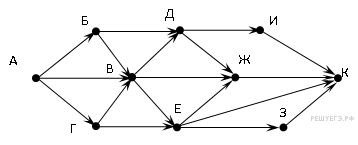

In [3]:
d = {
     'А': '',
     'Б': 'А', 
     'В': 'АБГ', 
     'Г': 'А',
     'Д': 'БВ',
     'Е': 'ВГ',
     'Ж': 'ВДЕ',
     'З': 'Е',
     'И': 'Д',
     'К': 'ЕЖЗИ'
     }

def get_label(node, d):
    if not d[node]:
        return 1
    label = 0
    for parent in d[node]:
        label += get_label(parent, d)
    return label

for node in d:
    print(node, get_label(node, d))


А 1
Б 1
В 3
Г 1
Д 4
Е 4
Ж 11
З 4
И 4
К 23


In [4]:
def get_label(start_node, node, d=d):
    if node == start_node:
        return 1
    label = 0
    for parent in d[node]:
        label += get_label(start_node, parent, d)
    return label

for node in d:
    print(node, get_label('А', node))

for node in d:
    print(node, get_label('Е', node, d))

А 1
Б 1
В 3
Г 1
Д 4
Е 4
Ж 11
З 4
И 4
К 23
А 0
Б 0
В 0
Г 0
Д 0
Е 1
Ж 1
З 1
И 0
К 3


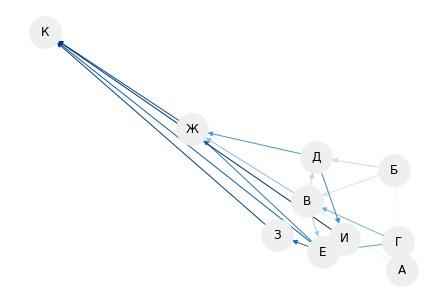

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph().to_directed()
for node in d:
    for parent in d[node]:
        G.add_edge(parent, node, weight=10, label=node)



pos = nx.layout.spring_layout(G)
nx.drawing.draw(G, pos, **{
    'node_size': 1000,
    "node_color": '#EFEFEF',
    "edge_color": range(len(G.edges())), # '#909090',
    "width": 1,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'cmap': plt.cm.BrBG
})


In [6]:
pos

{'А': array([ 0.39908185, -0.21791579]),
 'Б': array([0.36905888, 0.06484416]),
 'В': array([ 0.02712465, -0.02355477]),
 'Г': array([ 0.38631753, -0.14036511]),
 'Д': array([0.06419617, 0.0999315 ]),
 'Е': array([ 0.09087952, -0.16725287]),
 'Ж': array([-0.42233259,  0.1789861 ]),
 'З': array([-0.08876471, -0.11935533]),
 'И': array([ 0.17443868, -0.12951551]),
 'К': array([-1.        ,  0.45419763])}

In [7]:
pos = {
 'А': np.array([0, 0]),
 'Б': np.array([1, 1]),
 'В': np.array([1.5, 0]),
 'Г': np.array([1, -1 ]),
 'Д': np.array([2.5, 1]),
 'Е': np.array([2.5, -1]),
 'Ж': np.array([3, 0]),
 'З': np.array([4, -1]),
 'И': np.array([4,  1]),
 'К': np.array([4.5,  0])}

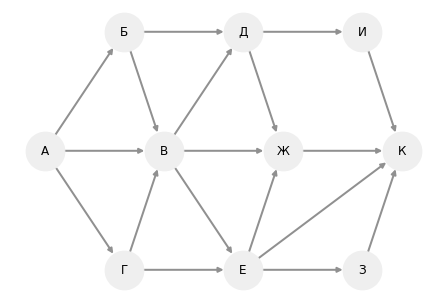

In [8]:
nx.drawing.draw(G, pos, **{
    'node_size': 1500,
    "node_color": '#EFEFEF',
    "edge_color": '#909090',
    "width": 2,
    "edge_cmap": plt.cm.Blues,
    "with_labels": True,
    'cmap': plt.cm.BrBG
})

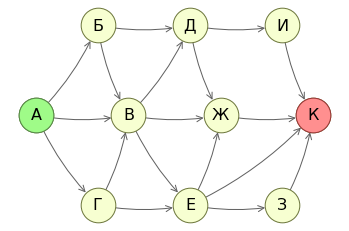

In [13]:
options = {"node_size": 1200, "alpha": 1,  }
labels = dict(zip(G.nodes, G.nodes))
nx.draw_networkx_nodes(G, pos, node_color="#f7ffd1", linewidths=1.0, edgecolors='#6d773c', **options)
nx.draw_networkx_nodes(G, pos, nodelist=['А'], node_color="#9ffb88", linewidths=1.0, edgecolors='#558a48', **options)
nx.draw_networkx_nodes(G, pos, nodelist=['К'], node_color='#ff8f8f', edgecolors='#9a3636', **options)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=1, edge_color="#616161", arrowstyle='->', arrowsize=15, node_size=1200, connectionstyle='arc3,rad=0.1')
nx.draw_networkx_labels(G, pos, labels, font_size=16)
plt.axis("off")
plt.show()

In [10]:
print(nx.dijkstra_path(G,'А','К'))

['А', 'В', 'Е', 'К']
